https://arxiv.org/abs/2203.12555

# Cyrillic Text Detection with PaddleOCR

This project implements text detection in images containing Cyrillic characters using PaddleOCR with multilingual support.

## Overview

The code provides a complete solution for detecting text regions in images with Cyrillic script. It uses PaddleOCR's text detection model along with angle classification to identify and highlight text areas, without performing recognition (OCR).

## Features

- GPU status verification
- PaddleOCR and Paddle framework version checking
- Text region detection in images
- Support for Cyrillic script (Russian language model)
- Angle classification for rotated text
- Visualization of detected text regions

## Requirements

- Python 3.x
- PaddlePaddle
- PaddleOCR
- PyTorch (for GPU monitoring)
- OpenCV
- Matplotlib
- PIL (Pillow)
- NumPy

## Model Files

The following models are required:
- Multilingual PP-OCRv3 detection model
- Chinese mobile v2.0 classification model
- Cyrillic PP-OCRv3 recognition model (for full OCR functionality)

## Usage

1. Install dependencies:
   ```
   pip install paddlepaddle paddleocr torch matplotlib pillow opencv-python numpy
   ```

2. Download required models:
   - Detection model: https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/Multilingual_PP-OCRv3_det_infer.tar
   - Classification model: https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar
   - Cyrillic recognition model: https://paddleocr.bj.bcebos.com/dygraph_v2.0/multilingual/cyrillic_ppocr_mobile_v2.0_rec_infer.tar

3. Extract the models to your project directory

4. Run the notebook cells sequentially to:
   - Check GPU status
   - Verify Paddle installation
   - Perform text detection and visualize results

## Configuration

The current implementation uses:
- Text detection: Enabled
- Angle classification: Enabled
- Text recognition: Disabled (set `rec=True` to enable)
- Language: Russian (`lang='ru'`)

## References

- [PaddleOCR Multilingual Documentation](https://github.com/PaddlePaddle/PaddleOCR/blob/main/doc/doc_en/multi_languages_en.md)
- [Cyrillic Model Configuration](https://github.com/PaddlePaddle/PaddleOCR/blob/main/configs/rec/PP-OCRv3/multi_language/cyrillic_PP-OCRv3_rec.yml)


/home/ubuntu/ocr_venv_py38/lib/python3.8/site-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


GPU = Tesla T4. Max memory = 14.568 GB.
0.0 GB of memory reserved.
Paddle version: 3.0.0-rc1
CUDA enabled: True
Running verify PaddlePaddle program ... 


I0429 12:03:44.290616 166763 pir_interpreter.cc:1508] New Executor is Running ...
W0429 12:03:44.292426 166763 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.4, Runtime API Version: 11.7
W0429 12:03:44.293383 166763 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
I0429 12:03:46.669589 166763 pir_interpreter.cc:1531] pir interpreter is running by multi-thread mode ...


PaddlePaddle works well on 1 GPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.
PaddleOCR version: 2.7.0.0
[2025/04/29 12:03:47] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/ubuntu/OCR/model/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/ubuntu/OCR/model/Multilingual_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils

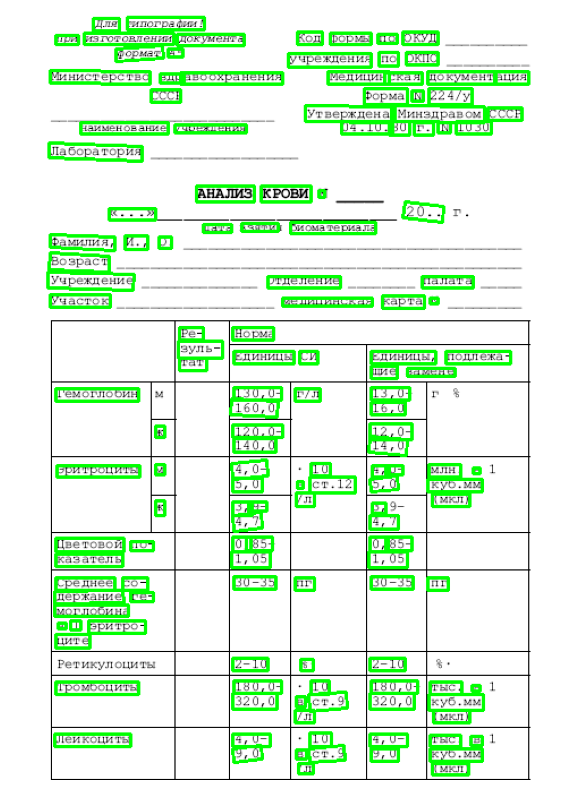

In [1]:
import torch 
import paddle 
import paddleocr 
import matplotlib.pyplot as plt 
from PIL import Image 
import cv2 
import numpy as np 

# Check GPU status
gpu_stats = torch.cuda.get_device_properties(0) 
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3) 
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3) 

# Display GPU information
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.") 
print(f"{start_gpu_memory} GB of memory reserved.")

# Verify Paddle installation and configuration
print(f"Paddle version: {paddle.__version__}") 
print(f"CUDA enabled: {paddle.is_compiled_with_cuda()}") 
paddle.utils.run_check() 

# Check PaddleOCR version
print(f"PaddleOCR version: {paddleocr.__version__}")

# Initialize PaddleOCR with specified model paths
def initialize_paddleocr(det_model_dir, cls_model_dir, use_angle_cls, lang):
    return paddleocr.PaddleOCR(
        use_gpu=False, 
        det_model_dir=det_model_dir, 
        cls_model_dir=cls_model_dir, 
        use_angle_cls=use_angle_cls, 
        lang=lang
    )

# Text detection using PaddleOCR with Cyrillic model
def text_detection(image_path, ocr):
    result = ocr.ocr(image_path, cls=True, det=True, rec=False)
    return result

# Draw bounding boxes around detected text regions
def draw_bounding_boxes(image_path, result):
    image = Image.open(image_path).convert('RGB') 
    image_np = np.array(image)  
    boxes = result[0]  
    for box in boxes:     
        box = np.array(box, dtype=np.int32)     
        box = box.reshape((-1, 1, 2))  
        cv2.polylines(image_np, [box], isClosed=True, color=(0, 255, 0), thickness=2)  
    return image_np

# Display the image with bounding boxes
def display_image(image_np):
    plt.figure(figsize=(10, 10)) 
    plt.imshow(image_np) 
    plt.axis('off') 
    plt.show()

# Main function
def main():
    det_model_dir = '/home/ubuntu/OCR/model/Multilingual_PP-OCRv3_det_infer'
    cls_model_dir = '/home/ubuntu/OCR/model/ch_ppocr_mobile_v2.0_cls_infer'
    use_angle_cls = True
    lang = 'ru'
    image_path = "/home/ubuntu/OCR/data/det/test/3.png"

    ocr = initialize_paddleocr(det_model_dir, cls_model_dir, use_angle_cls, lang)
    result = text_detection(image_path, ocr)
    image_np = draw_bounding_boxes(image_path, result)
    display_image(image_np)

if __name__ == "__main__":
    main()